In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/cancer_classification.csv')

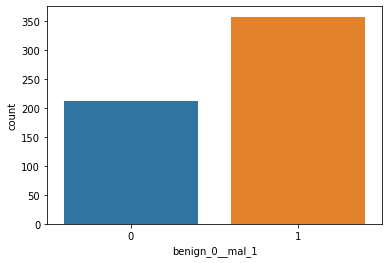

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

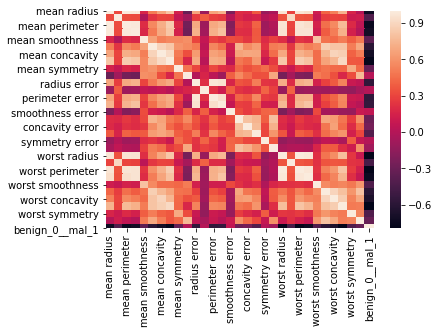

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

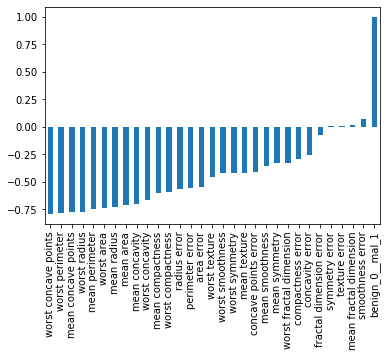

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 10ms/sample - loss: 0.7020 - val_loss: 0.6859
Epoch 2/600
426/426 [==============================] - 0s 520us/sample - loss: 0.6606 - val_loss: 0.6491
Epoch 3/600
426/426 [==============================] - 0s 162us/sample - loss: 0.6233 - val_loss: 0.6135
Epoch 4/600
426/426 [==============================] - 0s 180us/sample - loss: 0.5879 - val_loss: 0.5783
Epoch 5/600
426/426 [==============================] - 0s 164us/sample - loss: 0.5471 - val_loss: 0.5342
Epoch 6/600
426/426 [==============================] - 0s 152us/sample - loss: 0.5010 - val_loss: 0.4868
Epoch 7/600
426/426 [==============================] - 0s 157us/sample - loss: 0.4580 - val_loss: 0.4399
Epoch 8/600
426/426 [==============================] - 0s 162us/sample - loss: 0.4146 - val_loss: 0.3944
Epoch 9/600
426/426 [==============================] - 0s 185us/sample - loss: 0.3744 - val_loss: 0.3528
Epoch 10/6

426/426 [==============================] - 0s 124us/sample - loss: 0.0513 - val_loss: 0.1095
Epoch 78/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0518 - val_loss: 0.1108
Epoch 79/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0501 - val_loss: 0.1121
Epoch 80/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0503 - val_loss: 0.1130
Epoch 81/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0501 - val_loss: 0.1120
Epoch 82/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0497 - val_loss: 0.1130
Epoch 83/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0500 - val_loss: 0.1128
Epoch 84/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0483 - val_loss: 0.1134
Epoch 85/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0485 - val_loss: 0.1091
Epoch 86/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 115us/sample - loss: 0.0319 - val_loss: 0.1165
Epoch 154/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0327 - val_loss: 0.1109
Epoch 155/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0320 - val_loss: 0.1253
Epoch 156/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0312 - val_loss: 0.1127
Epoch 157/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0308 - val_loss: 0.1231
Epoch 158/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0335 - val_loss: 0.1123
Epoch 159/600
426/426 [==============================] - 0s 269us/sample - loss: 0.0323 - val_loss: 0.1169
Epoch 160/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0311 - val_loss: 0.1136
Epoch 161/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0304 - val_loss: 0.1191
Epoch 162/600
426/426 [============================

Epoch 230/600
426/426 [==============================] - 0s 478us/sample - loss: 0.0223 - val_loss: 0.1135
Epoch 231/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0225 - val_loss: 0.1166
Epoch 232/600
426/426 [==============================] - 0s 314us/sample - loss: 0.0209 - val_loss: 0.1203
Epoch 233/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0218 - val_loss: 0.1181
Epoch 234/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0227 - val_loss: 0.1234
Epoch 235/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0201 - val_loss: 0.1165
Epoch 236/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0220 - val_loss: 0.1187
Epoch 237/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0203 - val_loss: 0.1176
Epoch 238/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0190 - val_loss: 0.1223
Epoch 239/600
426/426 [==============

426/426 [==============================] - 0s 105us/sample - loss: 0.0133 - val_loss: 0.1273
Epoch 307/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0129 - val_loss: 0.1183
Epoch 308/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0136 - val_loss: 0.1251
Epoch 309/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0123 - val_loss: 0.1294
Epoch 310/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0139 - val_loss: 0.1228
Epoch 311/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0156 - val_loss: 0.1268
Epoch 312/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0122 - val_loss: 0.1255
Epoch 313/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0121 - val_loss: 0.1168
Epoch 314/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0132 - val_loss: 0.1279
Epoch 315/600
426/426 [=============================

Epoch 383/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0070 - val_loss: 0.1302
Epoch 384/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0064 - val_loss: 0.1186
Epoch 385/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0072 - val_loss: 0.1333
Epoch 386/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0068 - val_loss: 0.1256
Epoch 387/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0076 - val_loss: 0.1168
Epoch 388/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0071 - val_loss: 0.1365
Epoch 389/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0059 - val_loss: 0.1181
Epoch 390/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0075 - val_loss: 0.1235
Epoch 391/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0060 - val_loss: 0.1187
Epoch 392/600
426/426 [================

426/426 [==============================] - 0s 117us/sample - loss: 0.0047 - val_loss: 0.1354
Epoch 460/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0050 - val_loss: 0.1466
Epoch 461/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0035 - val_loss: 0.1409
Epoch 462/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0035 - val_loss: 0.1466
Epoch 463/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0031 - val_loss: 0.1500
Epoch 464/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0034 - val_loss: 0.1438
Epoch 465/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0045 - val_loss: 0.1536
Epoch 466/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0046 - val_loss: 0.1617
Epoch 467/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0039 - val_loss: 0.1467
Epoch 468/600
426/426 [==============================]

Epoch 536/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0019 - val_loss: 0.1645
Epoch 537/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0028 - val_loss: 0.1577
Epoch 538/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0035 - val_loss: 0.1823
Epoch 539/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0039 - val_loss: 0.1568
Epoch 540/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0039 - val_loss: 0.2066
Epoch 541/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0030 - val_loss: 0.1460
Epoch 542/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0021 - val_loss: 0.1654
Epoch 543/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0022 - val_loss: 0.1640
Epoch 544/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0035 - val_loss: 0.1616
Epoch 545/600
426/426 [==============

In [22]:
model_loss = pd.DataFrame(model.history.history)

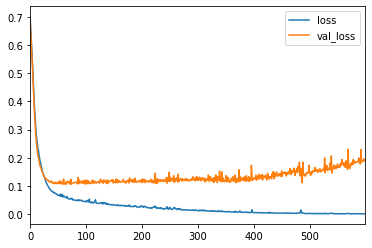

In [23]:
model_loss.plot()

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6609 - val_loss: 0.6367
Epoch 2/600
426/426 [==============================] - 0s 197us/sample - loss: 0.6104 - val_loss: 0.5892
Epoch 3/600
426/426 [==============================] - 0s 272us/sample - loss: 0.5637 - val_loss: 0.5416
Epoch 4/600
426/426 [==============================] - 0s 183us/sample - loss: 0.5142 - val_loss: 0.4872
Epoch 5/600
426/426 [==============================] - 0s 194us/sample - loss: 0.4616 - val_loss: 0.4395
Epoch 6/600
426/426 [==============================] - 0s 152us/sample - loss: 0.4153 - val_loss: 0.3949
Epoch 7/600
426/426 [==============================] - 0s 274us/sample - loss: 0.3749 - val_loss: 0.3548
Epoch 8/600
426/426 [==============================] - 0s 229us/sample - loss: 0.3381 - val_loss: 0.3182
Epoch 9/600
426/426 [==============================] - 0s 269us/sample - loss: 0.3063 - val_loss: 0.2873
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0526 - val_loss: 0.1095
Epoch 79/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0522 - val_loss: 0.1092
Epoch 80/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0515 - val_loss: 0.1087
Epoch 81/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0530 - val_loss: 0.1137
Epoch 82/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0510 - val_loss: 0.1100
Epoch 83/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0496 - val_loss: 0.1083
Epoch 00083: early stopping


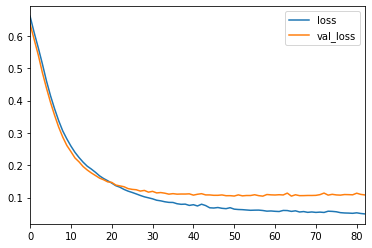

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 6ms/sample - loss: 0.7503 - val_loss: 0.6866
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.7057 - val_loss: 0.6669
Epoch 3/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6547 - val_loss: 0.6475
Epoch 4/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6811 - val_loss: 0.6275
Epoch 5/600
426/426 [==============================] - 0s 133us/sample - loss: 0.6626 - val_loss: 0.6112
Epoch 6/600
426/426 [==============================] - 0s 138us/sample - loss: 0.6454 - val_loss: 0.5955
Epoch 7/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6209 - val_loss: 0.5813
Epoch 8/600
426/426 [==============================] - 0s 137us/sample - loss: 0.6035 - val_loss: 0.5640
Epoch 9/600
426/426 [==============================] - 0s 122us/sample - loss: 0.5750 - val_loss: 0.5455
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1275 - val_loss: 0.0910
Epoch 79/600
426/426 [==============================] - 0s 154us/sample - loss: 0.1538 - val_loss: 0.1089
Epoch 80/600
426/426 [==============================] - 0s 166us/sample - loss: 0.1426 - val_loss: 0.0920
Epoch 81/600
426/426 [==============================] - 0s 140us/sample - loss: 0.1338 - val_loss: 0.0914
Epoch 82/600
426/426 [==============================] - 0s 137us/sample - loss: 0.1355 - val_loss: 0.0940
Epoch 83/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1176 - val_loss: 0.0894
Epoch 84/600
426/426 [==============================] - 0s 135us/sample - loss: 0.1118 - val_loss: 0.0942
Epoch 85/600
426/426 [==============================] - 0s 138us/sample - loss: 0.1365 - val_loss: 0.0906
Epoch 86/600
426/426 [==============================] - 0s 171us/sample - loss: 0.1330 - val_loss: 0.0911
Epoch 87/600
426/426 [========================

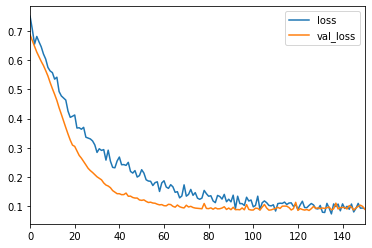

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
predictions = model.predict_classes(X_test)

In [37]:
#from sklearn.metrics import classification_report,confusion_matrixAC

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

